In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn import svm

In [2]:
data = pd.read_csv('PIMA.csv')
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

In [3]:
Standard = StandardScaler()
Standard.fit(X)
Standardized_data = Standard.transform(X)
X = Standardized_data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42, stratify=Y)
# print(X.shape, Y.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [5]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [6]:
y_pred = model.predict(x_test)

In [7]:
# Calculate accuracy
Accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# # Calculate recall
recall = recall_score(y_test, y_pred)

# # Calculate F1-score
f1_score = f1_score(y_test, y_pred)

# print("Accuracy : ", Accuracy)
# print("precision : ", precision)
# print("Recall : ", recall)
# print("f1_score : ", f1_score)

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

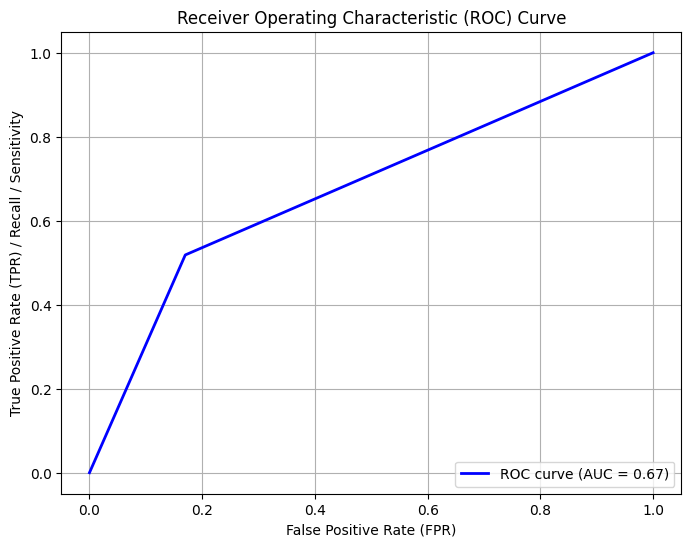

In [14]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall / Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

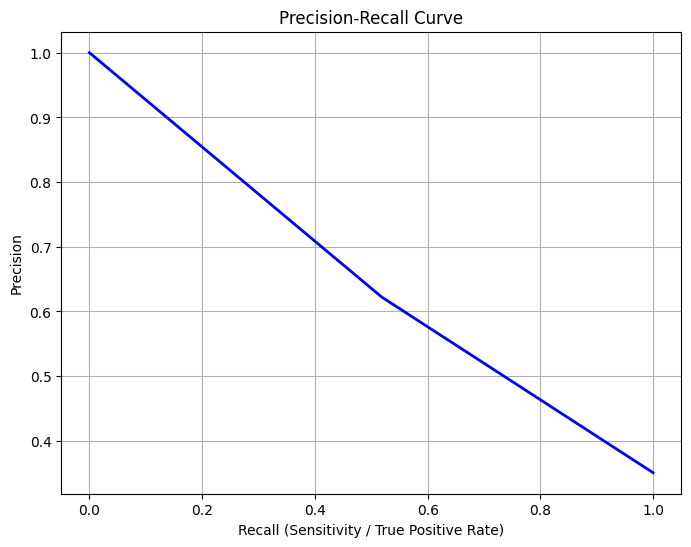

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall (Sensitivity / True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()